In [86]:
import jax.numpy as jnp
import matplotlib.pyplot as plt
from jaxgp.tests import testfunctions, optimizertesting

from jaxgp.utils import Logger
from jaxgp.kernels import RBF

## Initial playing around

In [87]:
# num_gridpoints = jnp.array([100,100])
# ran = (jnp.array([-5.0,5.0]), jnp.array([-5.0,5.0]))

In [88]:
# X, Y = optimizertesting.create_training_data_2D(0, num_gridpoints, ran, 0.0, testfunctions.himmelblau)
# Y = Y[:,0]

# means = jnp.load("./prediction_files/himmelblaumeansTNC.npz")
# stds = jnp.load("./prediction_files/himmelblaustdsTNC.npz")

In [89]:
# cut = -1
# Y_slice = Y.reshape(100,100)
# Y_slice = Y_slice[:,cut]
# mean_slice = means["arr_3"].reshape(100,100)
# mean_slice = mean_slice[:,cut]
# std_slice = stds["arr_3"].reshape(100,100)
# std_slice = std_slice[:,cut]

# x = jnp.linspace(*ran[0], 100)

# plt.plot(x,mean_slice)
# plt.fill_between(x, mean_slice-std_slice, mean_slice+std_slice, alpha=0.5)
# plt.plot(x,Y_slice)

In [90]:
# plt.pcolormesh(jnp.abs(Y-means["arr_3"]).reshape(100,100))
# plt.colorbar()

In [91]:
# plt.pcolormesh(Y.reshape(100,100))
# plt.colorbar()

In [92]:
# plt.pcolormesh(means["arr_3"].reshape(100,100))
# plt.colorbar()

In [93]:
# plt.pcolormesh(stds["arr_3"].reshape(100,100))
# plt.colorbar()

## Testing

In [94]:
optimizers = ["L-BFGS-B", "TNC", "SLSQP"]
fun = lambda x: testfunctions.himmelblau(x)/800.0
num_gridpoints = jnp.array([100,100])
ran = (jnp.array([-5.0,5.0]), jnp.array([-5.0,5.0]))

in_dir = "./data_files/different_number_of_datapoints/non-ext"

noise = 0.1
seed = 0

# grid1 = jnp.linspace(*ran[0],100)
# grid2 = jnp.linspace(*ran[1],100)
# grid = jnp.array(jnp.meshgrid(grid1, grid2)).reshape(2,-1).T

f_vals = [1, 5, 20, 50]
d_vals = [5, 20, 50, 100, 200, 400, 800]

# kernel = RBF(3)
# param_shape = (3,)
# param_bounds = (1e-3, 10.0)

iters_per_optimizer = 5

X_train, Y_train = optimizertesting.create_training_data_2D(seed, num_gridpoints, ran, noise, fun)

## Convergence with number of function and derivative observations

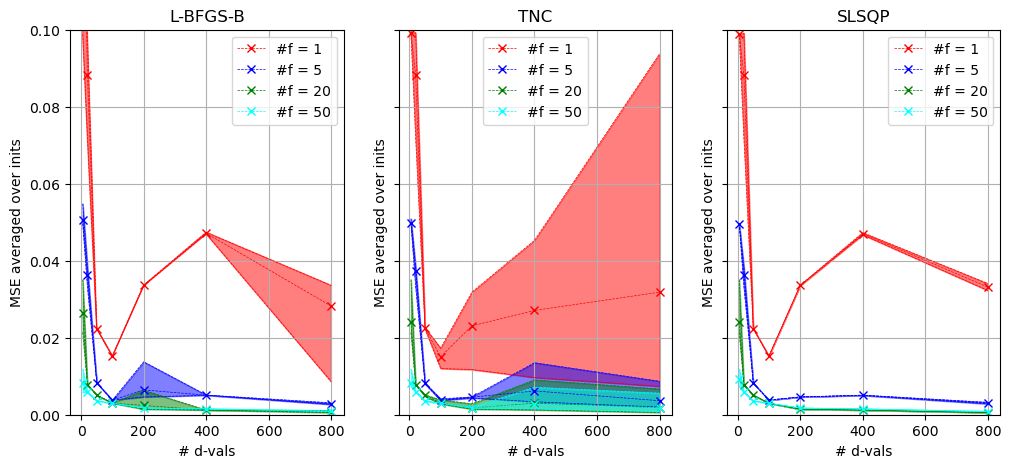

In [95]:
fig, ax = plt.subplots(1,len(optimizers),figsize=(12,5),sharey=True)

_, Y = optimizertesting.create_training_data_2D(0, num_gridpoints, ran, 0.0, fun)
Y = Y[:,0]

colors = ["r", "b", "g", "cyan"]

for i,optimizer in enumerate(optimizers):
    for color,num_f_vals in zip(colors,f_vals):
        avg = []
        mini = []
        maxi = []
        for num_d_vals in d_vals:
            means = jnp.load(f"{in_dir}/him_f{num_f_vals}d{num_d_vals}means{optimizer}.npz")

            avg_mse = 0
            min_mse = jnp.inf
            max_mse = -jnp.inf
            for iter, mean in enumerate(means.values()):
                mse = jnp.mean((Y-mean)**2)
                if mse < min_mse: min_mse = mse
                if mse > max_mse: max_mse = mse
                avg_mse += mse
            avg_mse /= iter + 1

            avg.append(avg_mse)
            mini.append(min_mse)
            maxi.append(max_mse)
        ax[i].plot(d_vals,avg,marker="x", lw=.5, ls="--",label=f"#f = {num_f_vals}", color=color)
        ax[i].plot(d_vals,mini, lw=.5, ls="--", color=color)
        ax[i].plot(d_vals,maxi, lw=.5, ls="--", color=color)
        ax[i].fill_between(d_vals, mini, maxi,alpha=0.5, color=color)
    ax[i].grid()
    ax[i].legend()
    ax[i].set_xlabel("# d-vals")
    ax[i].set_ylabel("MSE averaged over inits")
    ax[i].set_title(optimizer)
    ax[i].set_ylim(0,0.1)

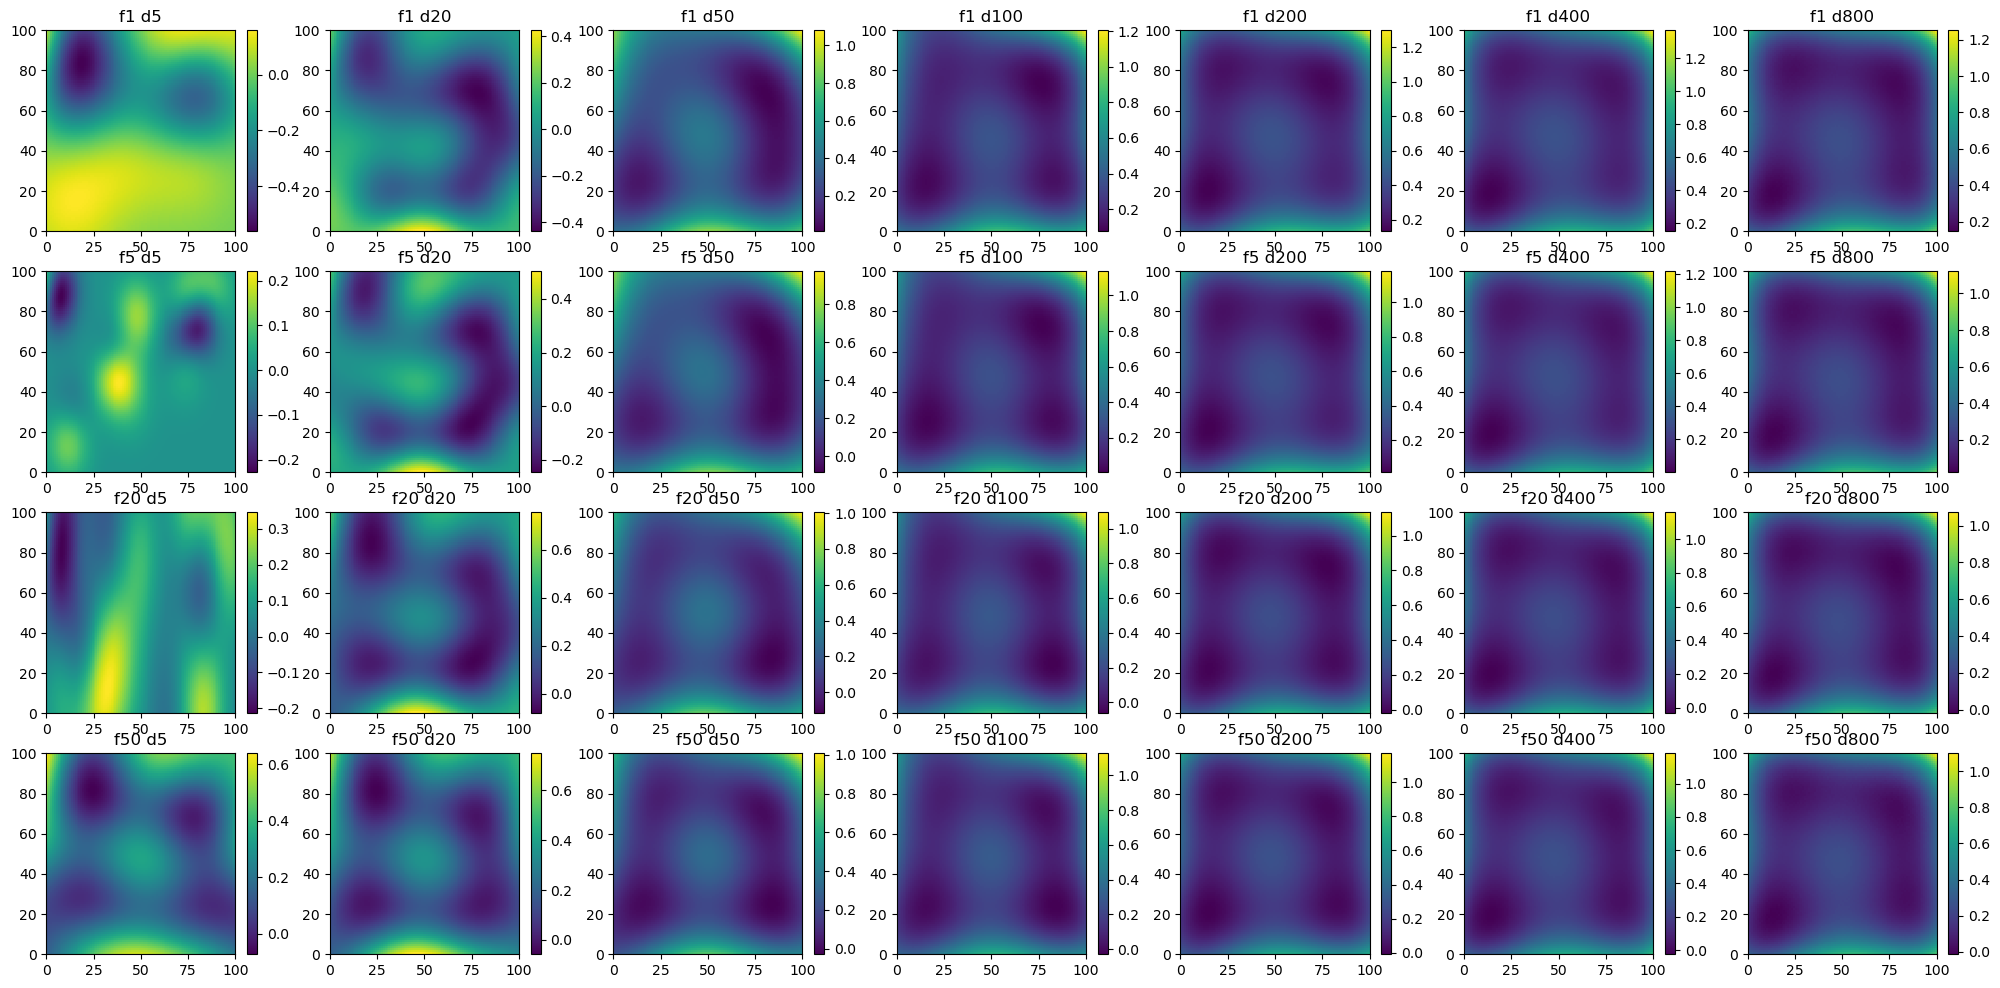

In [96]:
f_vals = [1, 5, 20, 50]
d_vals = [5, 20, 50, 100, 200, 400, 800]
# optimizer = "TNC"
# optimizer = "L-BFGS-B"
optimizer = "SLSQP"

fig, ax = plt.subplots(4,7, figsize=(25,12))

for i,num_f_vals in enumerate(f_vals):
    for j,num_d_vals in enumerate(d_vals):
        means = jnp.load(f"{in_dir}/him_f{num_f_vals}d{num_d_vals}means{optimizer}.npz")
        mean = means["arr_0"]
        
        ax[i,j].set_title(f"f{num_f_vals} d{num_d_vals}")
        im = ax[i,j].pcolormesh(mean.reshape(100,100))
        fig.colorbar(im, ax=ax[i,j])

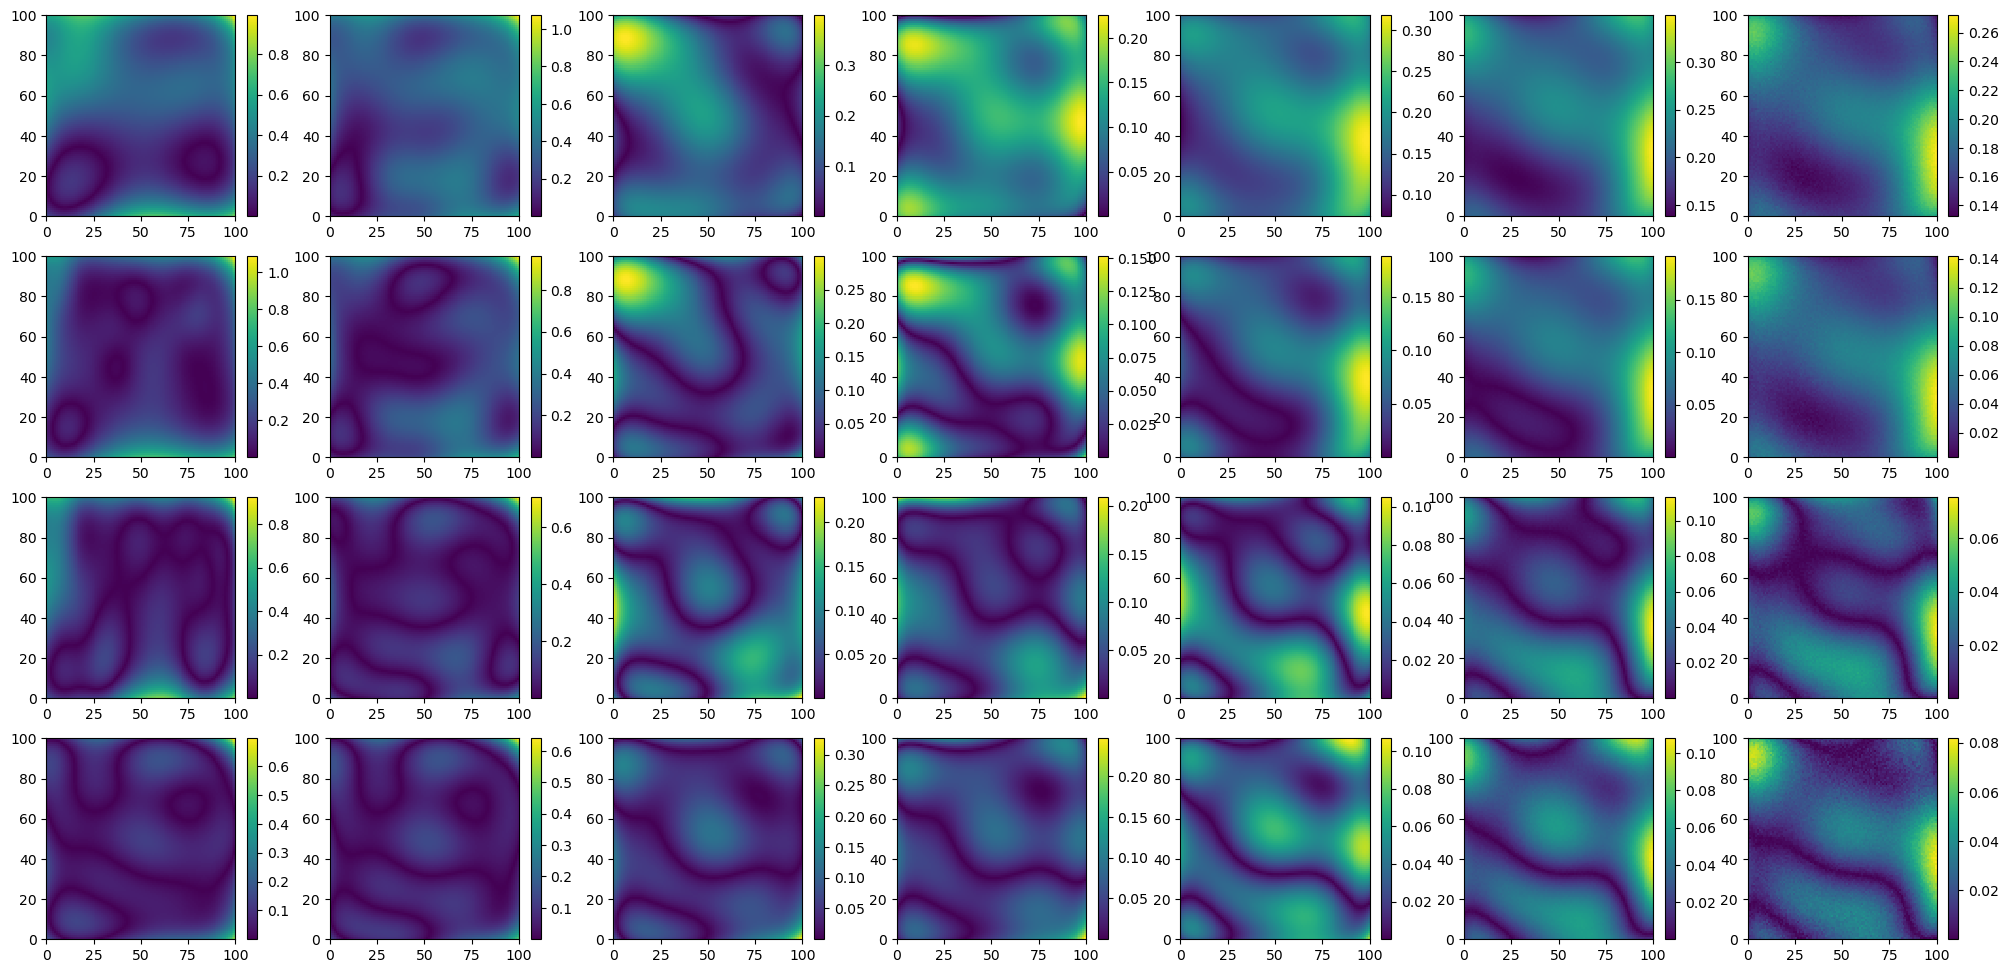

In [97]:
f_vals = [1, 5, 20, 50]
d_vals = [5, 20, 50, 100, 200, 400, 800]
# optimizer = "TNC"
# optimizer = "L-BFGS-B"
optimizer = "SLSQP"

_, Y_test = optimizertesting.create_training_data_2D(seed, num_gridpoints, ran, 0.0, fun)
Y_test = Y_test[:,0]

fig, ax = plt.subplots(4,7, figsize=(25,12))
f_vals = [1, 5, 20, 50]
d_vals = [5, 20, 50, 100, 200, 400, 800]
for i,num_f_vals in enumerate(f_vals):
    for j,num_d_vals in enumerate(d_vals):
        means = jnp.load(f"{in_dir}/him_f{num_f_vals}d{num_d_vals}means{optimizer}.npz")
        mean = means["arr_0"]
        
        im = ax[i,j].pcolormesh(jnp.abs(mean-Y_test).reshape(100,100))
        fig.colorbar(im, ax=ax[i,j])

## Different extensions for 2d sin function

In [98]:
optimizers = ["L-BFGS-B", "TNC", "SLSQP"]

fun = testfunctions.sin2d
num_gridpoints = jnp.array([100,100])

in_dir = "./data_files/different_number_of_datapoints/extended/periodic"

noise = 0.1
seed = 0

f_vals = [1, 5, 20, 50]
d_vals = [5, 20, 50, 100, 200, 400, 800]

iters_per_optimizer = 5

test_rans = [(jnp.array([0.0,1.5*jnp.pi]), jnp.array([0.0,1.5*jnp.pi])),
                (jnp.array([0.0,2*jnp.pi]), jnp.array([0.0,2*jnp.pi]))]
names = ["1.5"]#, "2.0"]

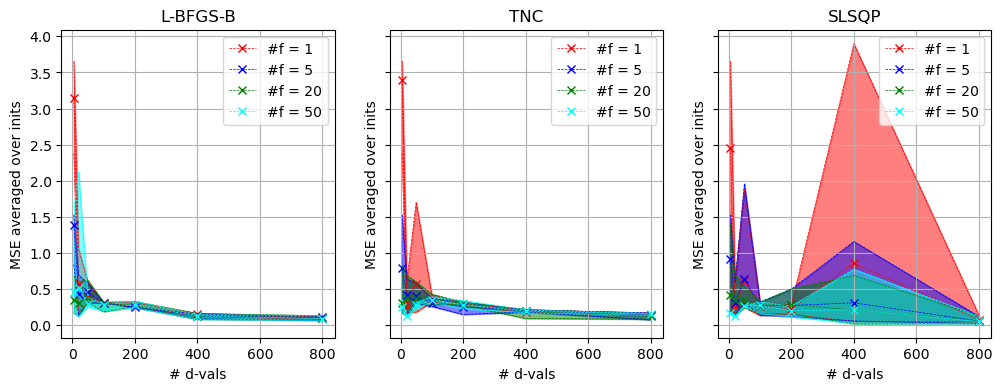

In [99]:
colors = ["r", "b", "g", "cyan"]

for i,(name, test_ran) in enumerate(zip(names, test_rans)):
    fig, ax = plt.subplots(1,len(optimizers),figsize=(12,4),sharey=True)

    _, Y = optimizertesting.create_training_data_2D(0, num_gridpoints, test_ran, 0.0, fun)
    Y = Y[:,0]
    for j,optimizer in enumerate(optimizers):
        for color,num_f_vals in zip(colors,f_vals):
            avg = []
            mini = []
            maxi = []
            for num_d_vals in d_vals:
                means = jnp.load(f"{in_dir}/sin_{name}pi_f{num_f_vals}d{num_d_vals}means{optimizer}.npz")

                avg_mse = 0
                min_mse = jnp.inf
                max_mse = -jnp.inf
                for iter, mean in enumerate(means.values()):
                    mse = jnp.mean((Y-mean)**2)
                    if mse < min_mse: min_mse = mse
                    if mse > max_mse: max_mse = mse
                    avg_mse += mse
                avg_mse /= iter + 1

                avg.append(avg_mse)
                mini.append(min_mse)
                maxi.append(max_mse)
            ax[j].plot(d_vals,avg,marker="x", lw=.5, ls="--",label=f"#f = {num_f_vals}", color=color)
            ax[j].plot(d_vals,mini, lw=.5, ls="--", color=color)
            ax[j].plot(d_vals,maxi, lw=.5, ls="--", color=color)
            ax[j].fill_between(d_vals, mini, maxi,alpha=0.5, color=color)
        ax[j].grid()
        ax[j].legend()
        ax[j].set_xlabel("# d-vals")
        ax[j].set_ylabel("MSE averaged over inits")
        ax[j].set_title(optimizer)

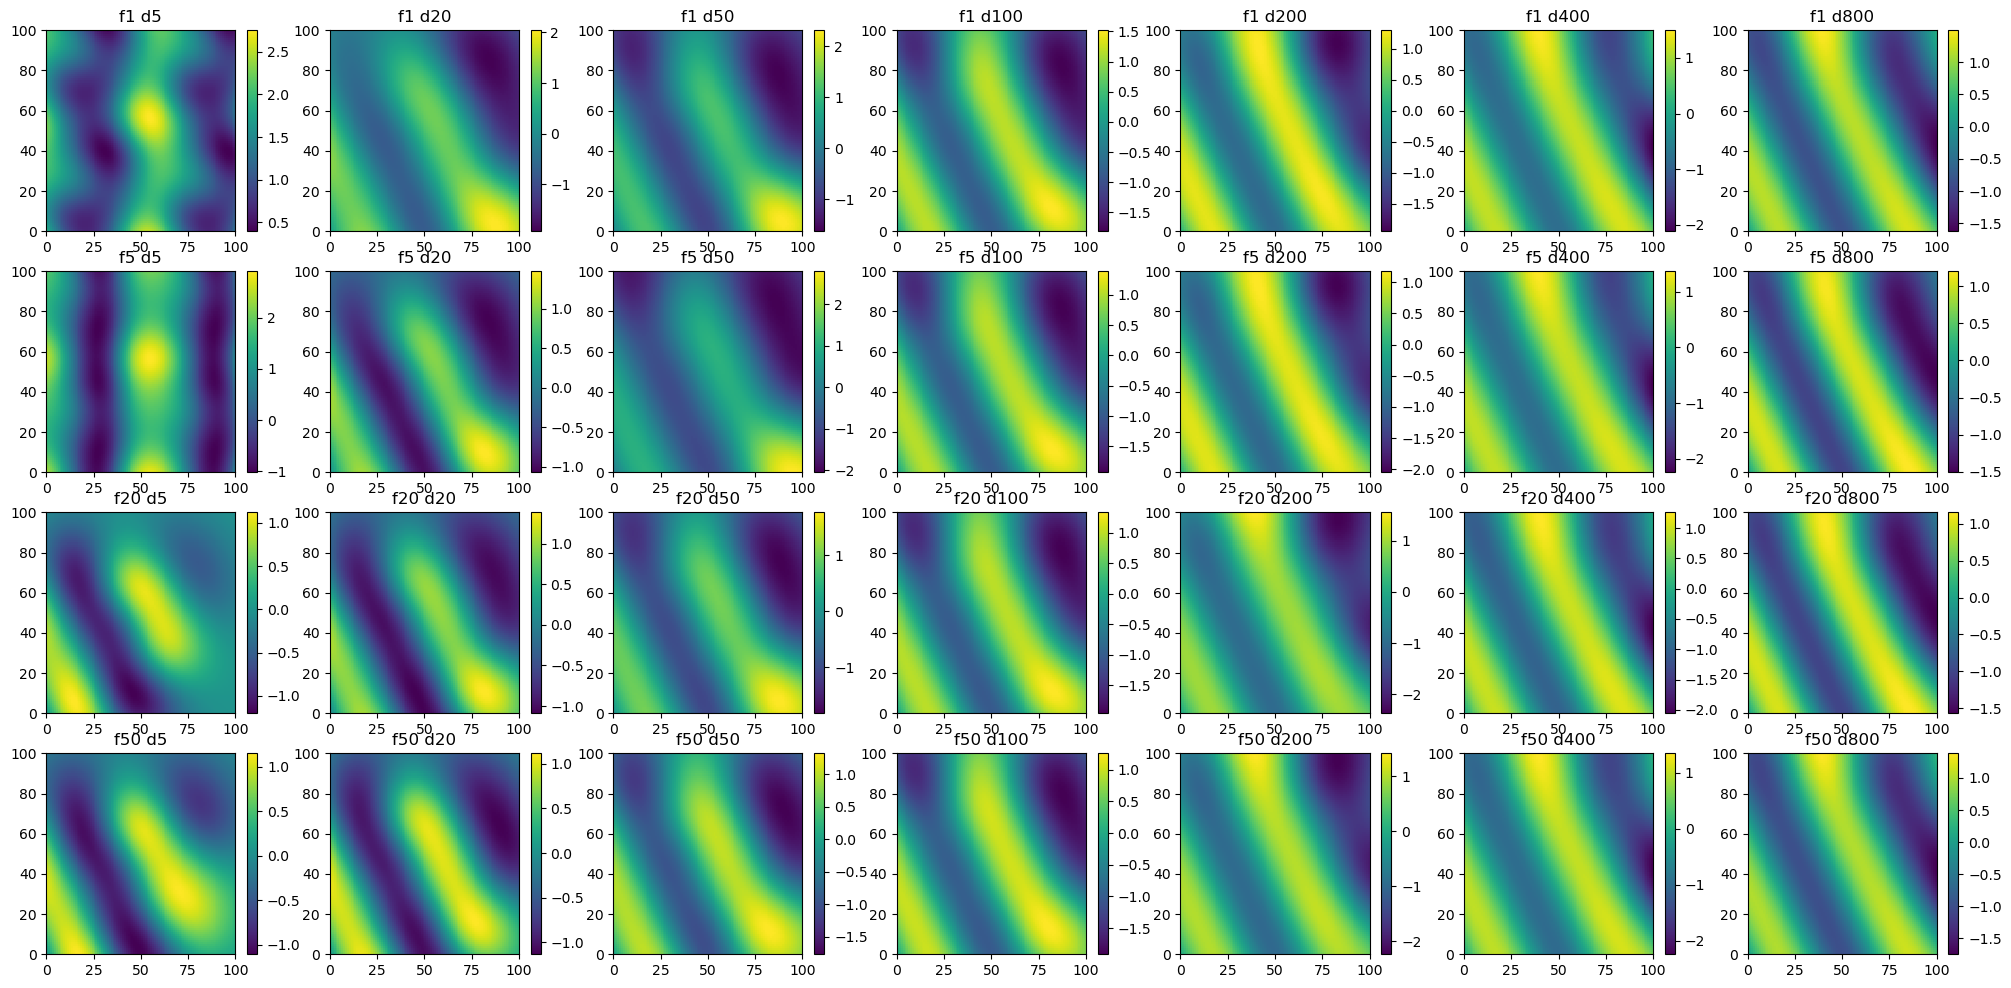

In [100]:
# optimizer = "TNC"
optimizer = "L-BFGS-B"
# optimizer = "SLSQP"

for name, test_ran in zip(names, test_rans):
    fig, ax = plt.subplots(4,7, figsize=(25,12))
    for i,num_f_vals in enumerate(f_vals):
        for j,num_d_vals in enumerate(d_vals):
            means = jnp.load(f"{in_dir}/sin_{name}pi_f{num_f_vals}d{num_d_vals}means{optimizer}.npz")
            mean = means["arr_1"]
            
            ax[i,j].set_title(f"f{num_f_vals} d{num_d_vals}")
            im = ax[i,j].pcolormesh(mean.reshape(100,100))
            fig.colorbar(im, ax=ax[i,j])

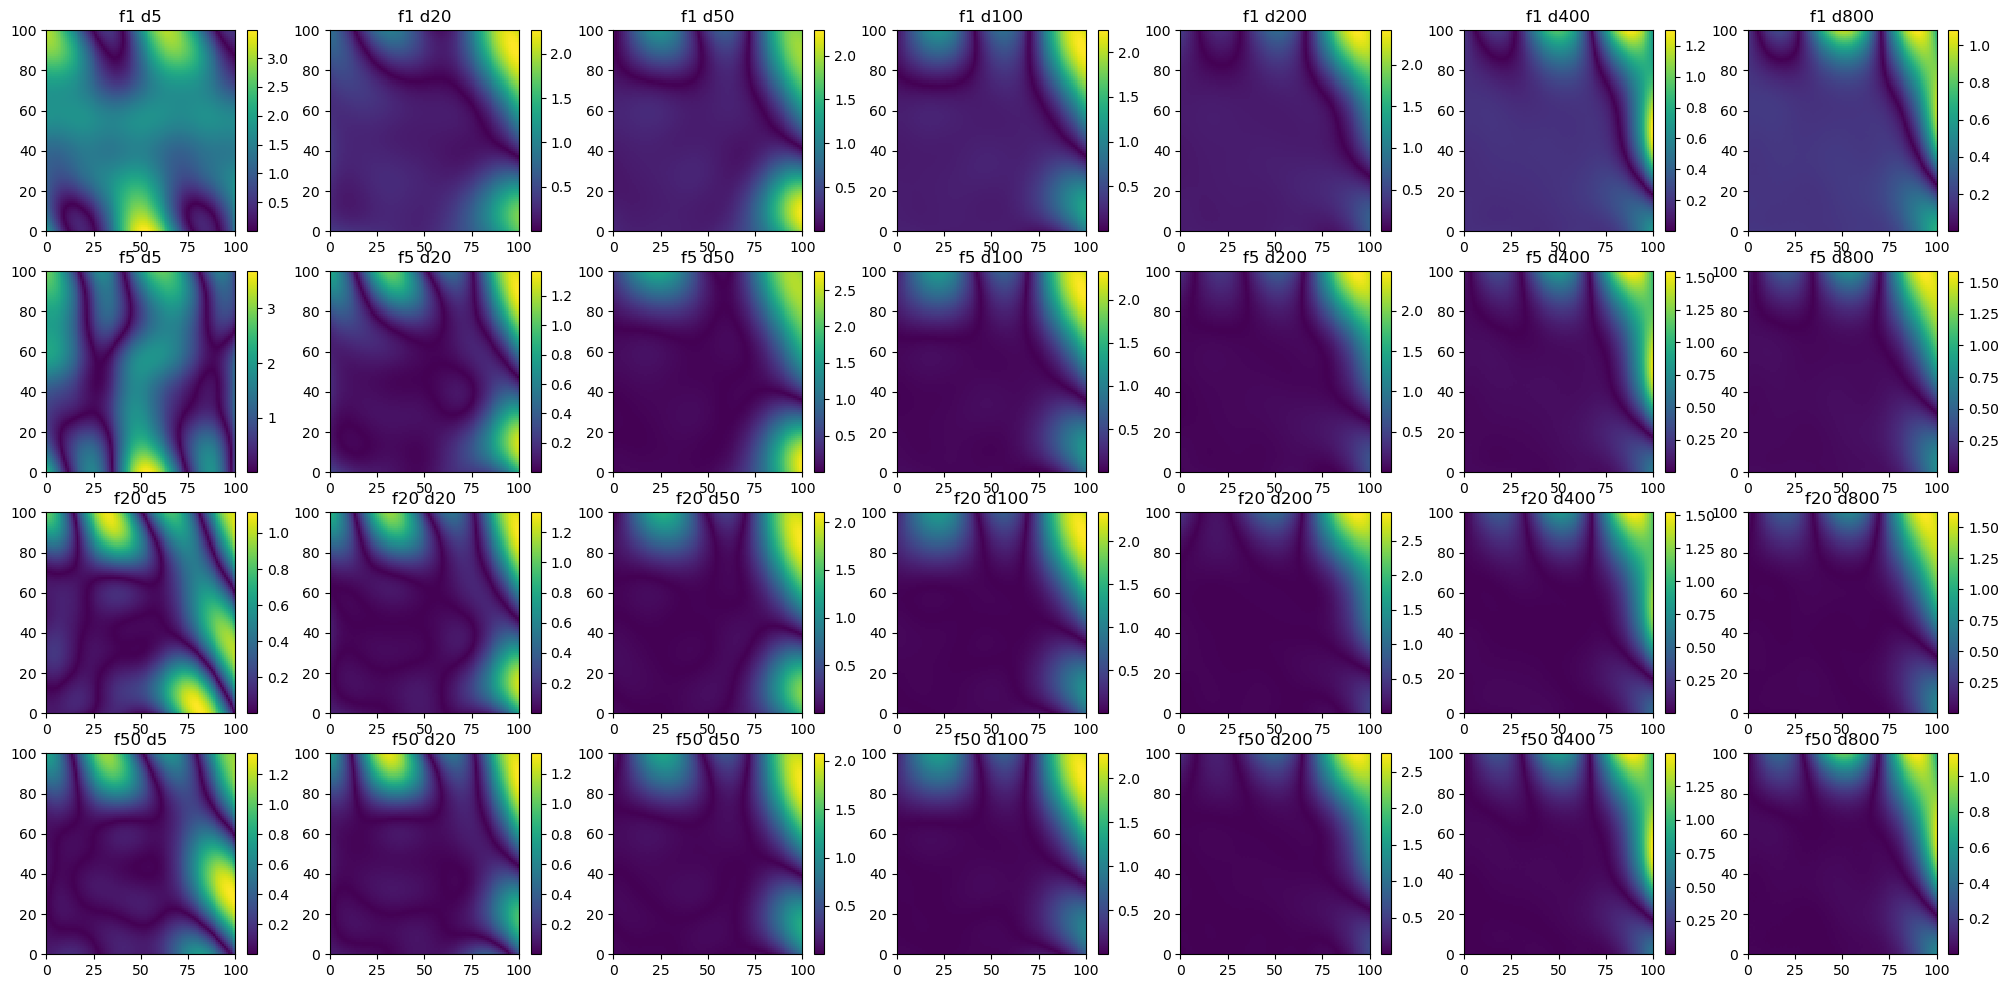

In [103]:
# optimizer = "TNC"
optimizer = "L-BFGS-B"
# optimizer = "SLSQP"

for name, test_ran in zip(names, test_rans):
    fig, ax = plt.subplots(4,7, figsize=(25,12))

    _, Y_test = optimizertesting.create_training_data_2D(seed, num_gridpoints, test_ran, 0.0, fun)
    Y_test = Y_test[:,0]
    for i,num_f_vals in enumerate(f_vals):
        for j,num_d_vals in enumerate(d_vals):
            means = jnp.load(f"{in_dir}/sin_{name}pi_f{num_f_vals}d{num_d_vals}means{optimizer}.npz")
            mean = means["arr_1"]
            
            ax[i,j].set_title(f"f{num_f_vals} d{num_d_vals}")
            im = ax[i,j].pcolormesh(jnp.abs(mean-Y_test).reshape(100,100))
            fig.colorbar(im, ax=ax[i,j])

In [102]:
# with open("test.txt",mode="w") as f:
#     for num_f_vals in f_vals:
#         for num_d_vals in d_vals:
#             _, Y = optimizertesting.create_training_data_2D(0, num_gridpoints, ran, 0.0, fun)
#             Y = Y[:,0]
            
#             f.write("-"*70 + "\n")
#             f.write(f"Current vals: {num_d_vals} d_vals, {num_f_vals} f_vals\n")
            
#             for optimizer in optimizers:
#                 means = jnp.load(f"{in_dir}/him_f{num_f_vals}d{num_d_vals}means{optimizer}.npz")
#                 stds = jnp.load(f"{in_dir}/him_f{num_f_vals}d{num_d_vals}stds{optimizer}.npz")

#                 f.write(f"optimizer: {optimizer}\n")

#                 for iter, (mean, std) in enumerate(zip(means.values(), stds.values())):
#                     conf68 = jnp.where(jnp.abs(Y-mean) <= std, 0, 1)
#                     conf95 = jnp.where(jnp.abs(Y-mean) <= 2*std, 0, 1)

#                     mse = jnp.mean((Y-mean)**2)

#                     maxdiff = jnp.max(jnp.abs(Y-mean))
#                     maxstd = jnp.max(std)

#                     f.write(f"iter {iter}: 68% = {jnp.mean(conf68):.5f}, 95% = {jnp.mean(conf95):.5f}, maxerr = {maxdiff:.5f}, mse = {mse:.5f}, maxstd = {maxstd:.5f}\n")